## 데이터 수집
- 식당: 식신에서 강남역, 회식/모임으로 필터되어 나온 식당으로 선정
- 리뷰: 네이버 마이플레이스에서 각 식당들의 리뷰만 수집함.

## 데이터 전처리

In [6]:
### 띄어쓰기, 맞춤법 검사기 사용을 위한 install
!pip install tensorflow==2.7.2
!pip install h5py==3.1.0
!pip install git+https://github.com/haven-jeon/PyKoSpacing.git
!pip install git+https://github.com/ssut/py-hanspell.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 671.4 MB 1.5 kB/s 
     |████████████████████████████████| 463 kB 29.9 MB/s 
     |████████████████████████████████| 1.3 MB 56.7 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.2+zzzcolab20220719082949
    Uninstalling tensorflow-2.8.2+zzzcolab20220719082949:
      Successfully uninstalled tensorflow-2.8.2+zzzcolab2022

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ssut/py-hanspell.git to /tmp/pip-req-build-t4ohpwjr
  Running command git clone -q https://github.com/ssut/py-hanspell.git /tmp/pip-req-build-t4ohpwjr
  Created wheel for py-hanspell: filename=py_hanspell-1.1-py3-none-any.whl size=4868 sha256=c22fd951e2b5df49a34c7587fba8a60afce2abd6030d8a6dd324ee2b95a1b3f5
  Stored in directory: /tmp/pip-ephem-wheel-cache-_5hf6h1e/wheels/ab/f5/7b/d4124bb329c905301baed80e2ae45aa14e824f62ebc3ec2cc4
Successfully built py-hanspell


In [1]:
# MeCab, nltk 설치
!pip install nltk
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2022-08-28 09:48:15--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz [following]
--2022-08-28 09:48:15--  https://www.dropbox.com/s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd0b57b6b7c5f169aff1a47c54c.dl.dropboxusercontent.com/cd/0/get/Br1dT9q1wLXhhGZ32Jw1a2cqEpbFG97NHCAmj70sNjNy3zLD3Znl3i8-4FB_F2457vhmHfOmti9nBcXXWAKhhdJk_IPhAxHBGSrfjSmEiINhDH9hKxWtmbgflpqboelX_Qrk2ZBpUxslg-vh5VQ-DsgvIbtUS3Jg8bw7LJG4dEDJ-MfpZ27hQd1HMuH6IUq9Q_U/file?dl=1# [following

In [7]:
#한글 깨짐 -> 설치 후 런타임 다시 시작 필요!
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (36.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import random as rn
import re
import os
import warnings
import folium
import geopy.distance
import konlpy
import MeCab
from hanspell import spell_checker
from pykospacing import Spacing
from collections import Counter
from konlpy.utils import pprint
from nltk import Text
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

plt.rc('font',  family='NanumGothic')
plt.rcParams["axes.unicode_minus"]=False #마이너스 깨짐 해결
%matplotlib inline
warnings.filterwarnings(action='ignore')

### 1) 이모티콘/기호, ㅠㅠ/ㅜㅜ
- python으로 진행할 수 없기에 사람이 눈으로 직접 보면서 체크
- 의미있는 이모티콘/기호 -> 단어로 변경
- 의미없는 이모티콘은 삭제
- ㅠㅠ/ㅜㅜ : 문장에 뜻에 맞추어 변경

### 2) 기호, 자음모음 제거

In [ ]:
text = '백억전복삼합 먹었는데 전복식감이 훌륭합니다'
new_sent = text.replace(" ", '')
spacing = Spacing()
kospacing_sent = spacing(new_sent)
print(new_sent)
print(kospacing_sent)

백억전복삼합먹었는데전복식감이훌륭합니다
백억 전복삼합 먹었는데 전복 식감이 훌륭합니다


In [ ]:
spelled_sent = spell_checker.check(kospacing_sent)
checked_sent = spelled_sent.checked
print(checked_sent)

백억 전복 삼합 먹었는데 전복 식감이 훌륭합니다


In [ ]:
data="/content/drive/MyDrive/Project/팀 프로젝트/3_company dinner/data/"

In [ ]:
df = pd.read_csv(os.path.join(data,"company_dinner_raw_data.csv"))
df.head()

,Store_name,Date,Review,Photo
0,백억하누 강남본점,22.1.11,너무 이쁘고 깔끔하게 잘 해놨네요 웃음 고기도 너무 맛있습니다,1
1,백억하누 강남본점,22.1.11,"소고기 너무 맛나요~하트 인테리어, 분위기 좋네요",1
2,백억하누 강남본점,22.1.11,코시국에 룸이 있어 좋습니다,0
3,백억하누 강남본점,22.1.11,오늘 저녁은~~투뿔한우로!!! 찐 맛집입니다 웃음,1
4,백억하누 강남본점,22.1.11,룸이 겸비해서 있어 코로나로 부터 안전하게 먹을 수 있어 만족합니다,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8951 entries, 0 to 8950
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Store_name  8951 non-null   object
 1   Date        8951 non-null   object
 2   Review      8798 non-null   object
 3   Photo       8951 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 279.8+ KB


In [ ]:
df['Review']=df['Review'].fillna("")
df.rename(columns={'Store_name':'store_name', 'Date':'date', 'Review':'review', 'Photo':'photo'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8951 entries, 0 to 8950
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   store_name  8951 non-null   object
 1   date        8951 non-null   object
 2   review      8951 non-null   object
 3   photo       8951 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 279.8+ KB


In [ ]:
# 의미없는 기호 제거
def cleanText(readData):
    text = re.sub('[-=+,#/\?:;^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…]', '', readData)
    return text

# 의미없는 자음,모음 제거
def cleanText2(readData):
    text = re.sub('[ㄱㄴㄷㄹㅁㅂㅅㅇㅈㅊㅋㅌㅍㅎㅃㅉㄸㄲㅆㅛㅕㅑㅐㅔㅗㅓㅏㅣㅜㅠㅡ]', '', readData)
    return text

In [ ]:
#'\n', '\r' -> ' '로 변환, 의미없는 기호, 자음모음 제거
df['review'] = df['review'].apply(lambda x: x.replace('\n',' '))
df['review'] = df['review'].apply(lambda x: x.replace('\r',' '))
df['review'] = df['review'].apply(cleanText)
df['review'] = df['review'].apply(cleanText2)
df['length'] = df['review'].apply(lambda x: len(x))

In [ ]:
df.head()

,store_name,date,review,photo,length
0,백억하누 강남본점,22.1.11,너무 이쁘고 깔끔하게 잘 해놨네요 웃음 고기도 너무 맛있습니다,1,34
1,백억하누 강남본점,22.1.11,소고기 너무 맛나요하트 인테리어 분위기 좋네요,1,25
2,백억하누 강남본점,22.1.11,코시국에 룸이 있어 좋습니다,0,15
3,백억하누 강남본점,22.1.11,오늘 저녁은투뿔한우로 찐 맛집입니다 웃음,1,22
4,백억하누 강남본점,22.1.11,룸이 겸비해서 있어 코로나로 부터 안전하게 먹을 수 있어 만족합니다,0,37


### 3) 띄어쓰기 및 맞춤법 검사
- 맞춤법 검사만 진행되는 경우, 잘못 해석되는 경우가 있음.
- 따라서, 문장을 다시 합쳐 띄어쓰기 진행 후 맞춤법 검사 진행함.

In [ ]:
df[df['length'] > 500].shape

(0, 5)

In [ ]:
df = df[df['length'] <= 500]
df.shape

(8951, 5)

In [ ]:
# 띄어쓰기 및 맞춤법 검사
def spacing_spell_ckeck(review):
  review_spacing=review.replace(" ", "")
  spacing=Spacing()
  kospaing_sent=spacing(review_spacing)
  result = spell_checker.check(kospaing_sent)
  return result.checked

In [ ]:
df['review_ckeck'] = df['review'].apply(spacing_spell_ckeck)
df.head()

,store_name,date,review,photo,length,review_ckeck
0,백억하누 강남본점,22.1.11,너무 이쁘고 깔끔하게 잘 해놨네요 웃음 고기도 너무 맛있습니다,1,34,너무 이쁘고 깔끔하게 잘해놨네 요 웃음 고기도 너무 맛있습니다
1,백억하누 강남본점,22.1.11,소고기 너무 맛나요하트 인테리어 분위기 좋네요,1,25,소고기 너무 맛나요 하트 인테리어 분위기 좋네요
2,백억하누 강남본점,22.1.11,코시국에 룸이 있어 좋습니다,0,15,고 시국에 룸이 있어 좋습니다
3,백억하누 강남본점,22.1.11,오늘 저녁은투뿔한우로 찐 맛집입니다 웃음,1,22,오늘 저녁은 투뿔 한우로 찐 맛 집입니다 웃음
4,백억하누 강남본점,22.1.11,룸이 겸비해서 있어 코로나로 부터 안전하게 먹을 수 있어 만족합니다,0,37,룸이 겸비해서 있어 코로나로부터 안전하게 먹을 수 있어 만족합니다


In [ ]:
df['date']='20'+df['date']
df.head()

,store_name,date,review,photo,length,review_ckeck
0,백억하누 강남본점,2022.1.11,너무 이쁘고 깔끔하게 잘 해놨네요 웃음 고기도 너무 맛있습니다,1,34,너무 이쁘고 깔끔하게 잘해놨네 요 웃음 고기도 너무 맛있습니다
1,백억하누 강남본점,2022.1.11,소고기 너무 맛나요하트 인테리어 분위기 좋네요,1,25,소고기 너무 맛나요 하트 인테리어 분위기 좋네요
2,백억하누 강남본점,2022.1.11,코시국에 룸이 있어 좋습니다,0,15,고 시국에 룸이 있어 좋습니다
3,백억하누 강남본점,2022.1.11,오늘 저녁은투뿔한우로 찐 맛집입니다 웃음,1,22,오늘 저녁은 투뿔 한우로 찐 맛 집입니다 웃음
4,백억하누 강남본점,2022.1.11,룸이 겸비해서 있어 코로나로 부터 안전하게 먹을 수 있어 만족합니다,0,37,룸이 겸비해서 있어 코로나로부터 안전하게 먹을 수 있어 만족합니다


In [ ]:
df.to_csv(os.path.join(data,"compnay_dinner_clean.csv"))

### 4) 맞춤법 점검
- 맞춤법 검사기로 진행하였으나 오류가 많아 직접 눈으로 체크하면서 오류를 체크함

### 5) 항목 나누기
- 7개의 항목(카테고리)으로 나누어 각 항목에 해당하는 단어 확인
- 리뷰 내 항목 관련 단어가 있으면 1, 없으면 0
- 카테고리가 다양하여 직접 눈으로 확인하면서 체크함.


### 6) 2019-05-26 이후로 추출
- 날짜 type 변경
- 주요 키워드 추출시 오래된 식당 관련 키워드로 쏠림을 막기 위해 모든 식당의 리뷰 데이터 기간을 맞춤

In [12]:
data="/content/drive/MyDrive/Project/팀 프로젝트/3_company dinner/data/"

In [13]:
df = pd.read_csv(os.path.join(data,"company_dinner_h_c_check_data.csv"))
df['review']=df['review'].fillna("")
df['review_check']=df['review_check'].fillna("")
df.head()

,store_name,date,review,length,review_check,menu,mood,service,price,clean,room,parking,photo,sum
0,화기애애 강남역점,2018.12.1,4명이서 5인분 이라고 되어있는 모듬 대를 시켰습니다 고기는 괜찮았고 양은 조금 ...,254,4명이서 5인분이라고 되어 있는 모둠대를 시켰습니다 고기는 괜찮았고 양은 조금 적었...,1,1,1,1,1,1,0,0,6
1,화기애애 강남역점,2019.3.19,가격대비 고기도 맛있고 직원도 친절하고 우리가 인원이 많아 시끄러울까봐 룸을 부탁드...,122,가격 대비 고기도 맛있고 직원도 친절하고 우리가 인원이 많아 시끄러울까 봐 룸을 부...,1,1,1,1,0,1,1,0,6
2,백억하누 강남본점,2020.1.3,네이버로 예약하고 방문했는데 사정이 있어 조용한 구석자리를 부탁한다고 썼는데도 구석...,358,네이버로 예약하고 방문했는데 사정이 있어 조용한 구석 자리를 부탁한다고 썼는데도 구...,1,1,1,1,1,1,0,0,6
3,강남진해장,2022.4.5,일반적인 양평해장국과 다르게 기본 간이 되어있고 베이스가 육개장과 뼈해장국같은 느...,343,일반적인 양평 해장국과 다르게 기본 간이 되어 있고 베이스가 육개장과 뼈해장국 같은...,1,1,1,1,0,1,0,1,6
4,백억하누 강남본점,2022.5.7,개인룸이 있고 룸안에 화장실이 있어 너무 편하고 좋았는데 옆에 개인 서랍이 있는지...,163,개인 룸이 있고 룸 안에 화장실이 있어 너무 편하고 좋았는데 옆에 개인 서랍이 있는...,1,1,1,0,1,1,0,1,6


In [14]:
df['length'] = df['review'].apply(lambda x: len(x))
df['check_length'] = df['review_check'].apply(lambda x: len(x))
df=df[['store_name', 'date', 'review', 'length', 'review_check', 'check_length', 'menu', 'mood', 'service', 'price', 'clean', 'room', 'parking', 'photo', 'sum']]
df.head()

,store_name,date,review,length,review_check,check_length,menu,mood,service,price,clean,room,parking,photo,sum
0,화기애애 강남역점,2018.12.1,4명이서 5인분 이라고 되어있는 모듬 대를 시켰습니다 고기는 괜찮았고 양은 조금 ...,254,4명이서 5인분이라고 되어 있는 모둠대를 시켰습니다 고기는 괜찮았고 양은 조금 적었...,251,1,1,1,1,1,1,0,0,6
1,화기애애 강남역점,2019.3.19,가격대비 고기도 맛있고 직원도 친절하고 우리가 인원이 많아 시끄러울까봐 룸을 부탁드...,122,가격 대비 고기도 맛있고 직원도 친절하고 우리가 인원이 많아 시끄러울까 봐 룸을 부...,130,1,1,1,1,0,1,1,0,6
2,백억하누 강남본점,2020.1.3,네이버로 예약하고 방문했는데 사정이 있어 조용한 구석자리를 부탁한다고 썼는데도 구석...,358,네이버로 예약하고 방문했는데 사정이 있어 조용한 구석 자리를 부탁한다고 썼는데도 구...,370,1,1,1,1,1,1,0,0,6
3,강남진해장,2022.4.5,일반적인 양평해장국과 다르게 기본 간이 되어있고 베이스가 육개장과 뼈해장국같은 느...,343,일반적인 양평 해장국과 다르게 기본 간이 되어 있고 베이스가 육개장과 뼈해장국 같은...,348,1,1,1,1,0,1,0,1,6
4,백억하누 강남본점,2022.5.7,개인룸이 있고 룸안에 화장실이 있어 너무 편하고 좋았는데 옆에 개인 서랍이 있는지...,163,개인 룸이 있고 룸 안에 화장실이 있어 너무 편하고 좋았는데 옆에 개인 서랍이 있는...,165,1,1,1,0,1,1,0,1,6


In [20]:
# helpful 도움이 되는 리뷰 3개 이상 포함될 경우 1, 미만인 경우 0
df['helpful'] = df['sum'].apply(lambda x: 1 if x>=3 else 0)
df.head()

,store_name,date,review,length,review_check,check_length,menu,mood,service,price,clean,room,parking,photo,sum,helpful
0,화기애애 강남역점,2018-12-01,4명이서 5인분 이라고 되어있는 모듬 대를 시켰습니다 고기는 괜찮았고 양은 조금 ...,254,4명이서 5인분이라고 되어 있는 모둠대를 시켰습니다 고기는 괜찮았고 양은 조금 적었...,251,1,1,1,1,1,1,0,0,6,1
1,화기애애 강남역점,2019-03-19,가격대비 고기도 맛있고 직원도 친절하고 우리가 인원이 많아 시끄러울까봐 룸을 부탁드...,122,가격 대비 고기도 맛있고 직원도 친절하고 우리가 인원이 많아 시끄러울까 봐 룸을 부...,130,1,1,1,1,0,1,1,0,6,1
2,백억하누 강남본점,2020-01-03,네이버로 예약하고 방문했는데 사정이 있어 조용한 구석자리를 부탁한다고 썼는데도 구석...,358,네이버로 예약하고 방문했는데 사정이 있어 조용한 구석 자리를 부탁한다고 썼는데도 구...,370,1,1,1,1,1,1,0,0,6,1
3,강남진해장,2022-04-05,일반적인 양평해장국과 다르게 기본 간이 되어있고 베이스가 육개장과 뼈해장국같은 느...,343,일반적인 양평 해장국과 다르게 기본 간이 되어 있고 베이스가 육개장과 뼈해장국 같은...,348,1,1,1,1,0,1,0,1,6,1
4,백억하누 강남본점,2022-05-07,개인룸이 있고 룸안에 화장실이 있어 너무 편하고 좋았는데 옆에 개인 서랍이 있는지...,163,개인 룸이 있고 룸 안에 화장실이 있어 너무 편하고 좋았는데 옆에 개인 서랍이 있는...,165,1,1,1,0,1,1,0,1,6,1


In [21]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8948 entries, 0 to 8947
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   store_name    8948 non-null   object        
 1   date          8948 non-null   datetime64[ns]
 2   review        8948 non-null   object        
 3   length        8948 non-null   int64         
 4   review_check  8948 non-null   object        
 5   check_length  8948 non-null   int64         
 6   menu          8948 non-null   int64         
 7   mood          8948 non-null   int64         
 8   service       8948 non-null   int64         
 9   price         8948 non-null   int64         
 10  clean         8948 non-null   int64         
 11  room          8948 non-null   int64         
 12  parking       8948 non-null   int64         
 13  photo         8948 non-null   int64         
 14  sum           8948 non-null   int64         
 15  helpful       8948 non-null   int64   

In [44]:
df['store_name'].value_counts()

딘타이펑 강남점         1766
백억하누 강남본점        1151
느린마을양조장 강남점      1092
화기애애 강남역점         570
라그릴리아 SPC스퀘어점     467
강남진해장             433
구스아일랜드 브루하우스      410
파파야리프             355
고양이부엌             335
시골야채된장            297
을밀대 강남점           285
담소사골순대 강남본점       280
청류벽               272
우동명가기리야마본진        269
신부자식당             250
오리지널시카고피자         184
대려도               157
봉추찜닭 강남주공공이점      134
리샨 삼성타운점          113
봉피양제주 강남점          71
Pavox              29
삼거리포차              28
Name: store_name, dtype: int64

In [41]:
date_min=df.groupby("store_name")['date'].min()
date_min.sort_values()

store_name
강남진해장           2011-08-15
시골야채된장          2013-09-29
딘타이펑 강남점        2016-09-08
라그릴리아 SPC스퀘어점   2016-10-05
고양이부엌           2017-01-30
느린마을양조장 강남점     2017-05-30
담소사골순대 강남본점     2018-06-12
화기애애 강남역점       2018-10-04
신부자식당           2018-10-14
백억하누 강남본점       2018-12-10
청류벽             2019-02-01
을밀대 강남점         2019-02-22
파파야리프           2019-02-23
오리지널시카고피자       2019-02-23
삼거리포차           2019-02-25
봉추찜닭 강남주공공이점    2019-03-01
구스아일랜드 브루하우스    2019-03-08
우동명가기리야마본진      2019-03-12
리샨 삼성타운점        2019-03-12
대려도             2019-05-26
Pavox           2019-08-21
봉피양제주 강남점       2020-04-16
Name: date, dtype: datetime64[ns]

In [42]:
date_max=df.groupby("store_name")['date'].max()
date_max.sort_values()

store_name
Pavox           2022-07-23
시골야채된장          2022-08-03
구스아일랜드 브루하우스    2022-08-06
대려도             2022-08-08
오리지널시카고피자       2022-08-08
리샨 삼성타운점        2022-08-08
을밀대 강남점         2022-08-12
봉추찜닭 강남주공공이점    2022-08-12
봉피양제주 강남점       2022-08-12
느린마을양조장 강남점     2022-08-14
삼거리포차           2022-08-14
고양이부엌           2022-08-15
청류벽             2022-08-16
라그릴리아 SPC스퀘어점   2022-08-16
신부자식당           2022-08-17
백억하누 강남본점       2022-08-17
화기애애 강남역점       2022-08-17
딘타이펑 강남점        2022-08-18
우동명가기리야마본진      2022-08-19
담소사골순대 강남본점     2022-08-19
강남진해장           2022-08-19
파파야리프           2022-08-19
Name: date, dtype: datetime64[ns]

In [22]:
# 리뷰가 어느정도 있는 가게 중 가장 최근부터 작성된 대려도 기중으로 data cut
df_re=df.copy()
df_re = df[df['date'] >= '2019-05-26']
df_re=df_re.reset_index(drop=True)
df_re.head()

,store_name,date,review,length,review_check,check_length,menu,mood,service,price,clean,room,parking,photo,sum,helpful
0,백억하누 강남본점,2020-01-03,네이버로 예약하고 방문했는데 사정이 있어 조용한 구석자리를 부탁한다고 썼는데도 구석...,358,네이버로 예약하고 방문했는데 사정이 있어 조용한 구석 자리를 부탁한다고 썼는데도 구...,370,1,1,1,1,1,1,0,0,6,1
1,강남진해장,2022-04-05,일반적인 양평해장국과 다르게 기본 간이 되어있고 베이스가 육개장과 뼈해장국같은 느...,343,일반적인 양평 해장국과 다르게 기본 간이 되어 있고 베이스가 육개장과 뼈해장국 같은...,348,1,1,1,1,0,1,0,1,6,1
2,백억하누 강남본점,2022-05-07,개인룸이 있고 룸안에 화장실이 있어 너무 편하고 좋았는데 옆에 개인 서랍이 있는지...,163,개인 룸이 있고 룸 안에 화장실이 있어 너무 편하고 좋았는데 옆에 개인 서랍이 있는...,165,1,1,1,0,1,1,0,1,6,1
3,딘타이펑 강남점,2019-11-21,분위기도 괜찮고 맛있어요 네이버예약 덕분에 에이드도 서비스로 나왔네요 가격은 비싸지...,59,분위기도 괜찮고 맛있어요 네이버예약 덕분에 에이드도 서비스로 나왔네요 가격은 비싸지...,59,1,1,1,1,0,1,0,1,6,1
4,백억하누 강남본점,2021-05-25,룸으로 이용했는데 화장실도 딸려있어서 너무 편했어요 삼합 재료들이 신선해서 생각보다...,265,룸으로 이용했는데 화장실도 딸려 있어서 너무 편했어요 삼합 재료들이 신선해서 생각보...,276,1,1,0,1,1,1,0,1,6,1


In [23]:
# 기존 식당 개수
df['store_name'].value_counts()

딘타이펑 강남점         1766
백억하누 강남본점        1151
느린마을양조장 강남점      1092
화기애애 강남역점         570
라그릴리아 SPC스퀘어점     467
강남진해장             433
구스아일랜드 브루하우스      410
파파야리프             355
고양이부엌             335
시골야채된장            297
을밀대 강남점           285
담소사골순대 강남본점       280
청류벽               272
우동명가기리야마본진        269
신부자식당             250
오리지널시카고피자         184
대려도               157
봉추찜닭 강남주공공이점      134
리샨 삼성타운점          113
봉피양제주 강남점          71
Pavox              29
삼거리포차              28
Name: store_name, dtype: int64

In [24]:
# 2019년 5월 26일 이후 식당 개수 >> 딘타이펑이 확실히 줄어듦
df_re['store_name'].value_counts()

딘타이펑 강남점         1296
백억하누 강남본점        1111
느린마을양조장 강남점       624
화기애애 강남역점         504
라그릴리아 SPC스퀘어점     435
강남진해장             424
구스아일랜드 브루하우스      404
파파야리프             353
고양이부엌             331
시골야채된장            286
을밀대 강남점           283
담소사골순대 강남본점       278
청류벽               269
우동명가기리야마본진        268
신부자식당             247
오리지널시카고피자         183
대려도               157
봉추찜닭 강남주공공이점      131
리샨 삼성타운점          112
봉피양제주 강남점          71
Pavox              29
삼거리포차              26
Name: store_name, dtype: int64

### 7) MeCab를 이용해 키워드 추출 및 체크
- 1) MeCab 중 NNG, NNP이 키워드 중 top30 확인
- 2) 맛집+회식에 해당하는 키워드로 추출 및 특정 가게에 해당하는 키워드는 제외

In [25]:
def getNVM_lemma(text):
    tokenizer = MeCab.Tagger()
    parsed = tokenizer.parse(text)
    #print(parsed)
    word_tag = [w for w in parsed.split("\n")] 
    pos = []
    tags = ['NNG', 'NNP']
   
    for word_ in word_tag[:-2]:
        word = word_.split('\t') #['아버지', 'NNG,*,F,아버지,*,*,*,*']
        tag = word[1].split(",")  #['EC', '*', 'F', '는다', '*', '*', '*', '*']
        # if('+' in tag[0]): #단어가 여러 형태소로 구성된 경우
        #     if ('VV' in tag[0] or 'VA' in tag[0] or 'VX' in tag[0]):
        #         t = tag[-1].split('/')[0]
        #         if t not in stop_words:
        #             pos.append(t)
        if tag[0] in tags:
          pos.append(word[0])
    return pos

In [26]:
r_all = ''
for i in range(df.shape[0]):
    r_all = r_all + df['review_check'][i]

In [27]:
# 기존 데이터
text = getNVM_lemma(r_all)
keywords = Counter(text)
keywords.most_common(n=30)

[('웃음', 1318),
 ('맛', 1158),
 ('친절', 1011),
 ('음식', 915),
 ('굿', 829),
 ('예약', 800),
 ('분위기', 654),
 ('직원', 636),
 ('고기', 527),
 ('막걸리', 501),
 ('서비스', 483),
 ('방문', 454),
 ('가격', 401),
 ('실망', 363),
 ('만족', 354),
 ('때', 337),
 ('안주', 333),
 ('자리', 311),
 ('양', 291),
 ('바오', 273),
 ('맛집', 271),
 ('메뉴', 269),
 ('사람', 257),
 ('시간', 256),
 ('룽', 255),
 ('최고', 254),
 ('주문', 250),
 ('샤오', 249),
 ('다음', 245),
 ('식사', 242)]

In [28]:
r_all_re = ''
for i in range(df_re.shape[0]):
    r_all_re = r_all_re + df_re['review_check'][i]

In [29]:
text = getNVM_lemma(r_all_re)
keywords_re = Counter(text)
keywords_re.most_common(n=30)

[('웃음', 1072),
 ('맛', 964),
 ('친절', 805),
 ('굿', 781),
 ('음식', 673),
 ('직원', 497),
 ('분위기', 490),
 ('고기', 486),
 ('방문', 359),
 ('예약', 351),
 ('가격', 341),
 ('서비스', 303),
 ('실망', 277),
 ('때', 274),
 ('양', 263),
 ('맛집', 262),
 ('만족', 252),
 ('막걸리', 249),
 ('맥주', 219),
 ('최고', 211),
 ('메뉴', 206),
 ('곳', 204),
 ('식사', 201),
 ('사람', 195),
 ('바오', 195),
 ('다음', 187),
 ('추천', 186),
 ('주문', 183),
 ('룽', 178),
 ('안주', 177)]

In [30]:
df_re['맛'] = df_re['review_check'].apply(lambda x: 1 if '맛' in x else 0)
df_re['맛집'] = df_re['review_check'].apply(lambda x: 1 if '맛집' in x else 0)
df_re['메뉴_음식'] = df_re['review_check'].apply(lambda x: 1 if ('메뉴' in x) or ('음식' in x) else 0)
df_re['친절_직원'] = df_re['review_check'].apply(lambda x: 1 if ('친절' in x) or ('직원' in x) else 0)
df_re['때'] = df_re['review_check'].apply(lambda x: 1 if '때' in x else 0)
df_re['예약'] = df_re['review_check'].apply(lambda x: 1 if '예약' in x else 0)
df_re['가격'] = df_re['review_check'].apply(lambda x: 1 if '가격' in x else 0)
df_re['분위기'] = df_re['review_check'].apply(lambda x: 1 if '분위기' in x else 0)
df_re['추천'] = df_re['review_check'].apply(lambda x: 1 if '추천' in x else 0)
df_re.head()

,store_name,date,review,length,review_check,check_length,menu,mood,service,price,...,helpful,맛,맛집,메뉴_음식,친절_직원,때,예약,가격,분위기,추천
0,백억하누 강남본점,2020-01-03,네이버로 예약하고 방문했는데 사정이 있어 조용한 구석자리를 부탁한다고 썼는데도 구석...,358,네이버로 예약하고 방문했는데 사정이 있어 조용한 구석 자리를 부탁한다고 썼는데도 구...,370,1,1,1,1,...,1,0,0,1,1,0,1,0,0,0
1,강남진해장,2022-04-05,일반적인 양평해장국과 다르게 기본 간이 되어있고 베이스가 육개장과 뼈해장국같은 느...,343,일반적인 양평 해장국과 다르게 기본 간이 되어 있고 베이스가 육개장과 뼈해장국 같은...,348,1,1,1,1,...,1,1,0,1,0,0,0,1,0,0
2,백억하누 강남본점,2022-05-07,개인룸이 있고 룸안에 화장실이 있어 너무 편하고 좋았는데 옆에 개인 서랍이 있는지...,163,개인 룸이 있고 룸 안에 화장실이 있어 너무 편하고 좋았는데 옆에 개인 서랍이 있는...,165,1,1,1,0,...,1,1,0,1,1,0,0,0,0,0
3,딘타이펑 강남점,2019-11-21,분위기도 괜찮고 맛있어요 네이버예약 덕분에 에이드도 서비스로 나왔네요 가격은 비싸지...,59,분위기도 괜찮고 맛있어요 네이버예약 덕분에 에이드도 서비스로 나왔네요 가격은 비싸지...,59,1,1,1,1,...,1,1,0,0,0,0,1,1,1,0
4,백억하누 강남본점,2021-05-25,룸으로 이용했는데 화장실도 딸려있어서 너무 편했어요 삼합 재료들이 신선해서 생각보다...,265,룸으로 이용했는데 화장실도 딸려 있어서 너무 편했어요 삼합 재료들이 신선해서 생각보...,276,1,1,0,1,...,1,1,0,1,0,0,0,0,0,0


### 8) 식당이름 변경 (숫자 및 각각 원핫인코딩)

In [31]:
dict_store = {'딘타이펑 강남점':0,'백억하누 강남본점':1, '화기애애 강남역점':2, '라그릴리아 SPC스퀘어점':3,
              '강남진해장':4, '구스아일랜드 브루하우스':5, '파파야리프':6, '고양이부엌':7, '시골야채된장':8,
              '을밀대 강남점':9, '담소사골순대 강남본점':10, '청류벽':11, '우동명가기리야마본진':12,
              '신부자식당':13, '오리지널시카고피자':14, '대려도':15, '봉추찜닭 강남주공공이점':16,
              '리샨 삼성타운점':17, '봉피양제주 강남점':18, 'Pavox':19, '삼거리포차':20, '느린마을양조장 강남점':21}
df_re['store'] = df_re['store_name'].map(dict_store)
df_re.head()

,store_name,date,review,length,review_check,check_length,menu,mood,service,price,...,맛,맛집,메뉴_음식,친절_직원,때,예약,가격,분위기,추천,store
0,백억하누 강남본점,2020-01-03,네이버로 예약하고 방문했는데 사정이 있어 조용한 구석자리를 부탁한다고 썼는데도 구석...,358,네이버로 예약하고 방문했는데 사정이 있어 조용한 구석 자리를 부탁한다고 썼는데도 구...,370,1,1,1,1,...,0,0,1,1,0,1,0,0,0,1
1,강남진해장,2022-04-05,일반적인 양평해장국과 다르게 기본 간이 되어있고 베이스가 육개장과 뼈해장국같은 느...,343,일반적인 양평 해장국과 다르게 기본 간이 되어 있고 베이스가 육개장과 뼈해장국 같은...,348,1,1,1,1,...,1,0,1,0,0,0,1,0,0,4
2,백억하누 강남본점,2022-05-07,개인룸이 있고 룸안에 화장실이 있어 너무 편하고 좋았는데 옆에 개인 서랍이 있는지...,163,개인 룸이 있고 룸 안에 화장실이 있어 너무 편하고 좋았는데 옆에 개인 서랍이 있는...,165,1,1,1,0,...,1,0,1,1,0,0,0,0,0,1
3,딘타이펑 강남점,2019-11-21,분위기도 괜찮고 맛있어요 네이버예약 덕분에 에이드도 서비스로 나왔네요 가격은 비싸지...,59,분위기도 괜찮고 맛있어요 네이버예약 덕분에 에이드도 서비스로 나왔네요 가격은 비싸지...,59,1,1,1,1,...,1,0,0,0,0,1,1,1,0,0
4,백억하누 강남본점,2021-05-25,룸으로 이용했는데 화장실도 딸려있어서 너무 편했어요 삼합 재료들이 신선해서 생각보다...,265,룸으로 이용했는데 화장실도 딸려 있어서 너무 편했어요 삼합 재료들이 신선해서 생각보...,276,1,1,0,1,...,1,0,1,0,0,0,0,0,0,1


In [32]:
df_re['딘타이펑'] = df_re['store_name'].apply(lambda x: 1 if x=='딘타이펑 강남점' else 0)
df_re['백억하누'] = df_re['store_name'].apply(lambda x: 1 if x=='백억하누 강남본점' else 0)
df_re['화기애애'] = df_re['store_name'].apply(lambda x: 1 if x=='화기애애 강남역점' else 0)
df_re['라그릴리아'] = df_re['store_name'].apply(lambda x: 1 if x=='라그릴리아 SPC스퀘어점' else 0)
df_re['강남진해장'] = df_re['store_name'].apply(lambda x: 1 if x=='강남진해장' else 0)
df_re['구스'] = df_re['store_name'].apply(lambda x: 1 if x=='구스아일랜드 브루하우스' else 0)
df_re['파파야리프'] = df_re['store_name'].apply(lambda x: 1 if x=='파파야리프' else 0)
df_re['고양이부엌'] = df_re['store_name'].apply(lambda x: 1 if x=='고양이부엌' else 0)
df_re['시골야채된장'] = df_re['store_name'].apply(lambda x: 1 if x=='시골야채된장' else 0)
df_re['을밀대'] = df_re['store_name'].apply(lambda x: 1 if x=='을밀대 강남점' else 0)
df_re['담소'] = df_re['store_name'].apply(lambda x: 1 if x=='담소사골순대 강남본점' else 0)
df_re['청류벽'] = df_re['store_name'].apply(lambda x: 1 if x=='청류벽' else 0)
df_re['기리야마'] = df_re['store_name'].apply(lambda x: 1 if x=='우동명가기리야마본진' else 0)
df_re['시카고'] = df_re['store_name'].apply(lambda x: 1 if x=='리지널시카고피자' else 0)
df_re['대려도'] = df_re['store_name'].apply(lambda x: 1 if x=='대려도' else 0)
df_re['신부자'] = df_re['store_name'].apply(lambda x: 1 if x=='신부자식당' else 0)
df_re['봉추찜닭'] = df_re['store_name'].apply(lambda x: 1 if x=='봉추찜닭 강남주공공이점' else 0)
df_re['리샨'] = df_re['store_name'].apply(lambda x: 1 if x=='리샨 삼성타운점' else 0)
df_re['Pavox'] = df_re['store_name'].apply(lambda x: 1 if x=='Pavox' else 0)
df_re['삼거리'] = df_re['store_name'].apply(lambda x: 1 if x=='삼거리포차' else 0)
df_re['느린마을'] = df_re['store_name'].apply(lambda x: 1 if x=='느린마을양조장 강남점' else 0)
df_re['봉피양'] = df_re['store_name'].apply(lambda x: 1 if x=='봉피양제주 강남점' else 0)
df_re.head()

,store_name,date,review,length,review_check,check_length,menu,mood,service,price,...,기리야마,시카고,대려도,신부자,봉추찜닭,리샨,Pavox,삼거리,느린마을,봉피양
0,백억하누 강남본점,2020-01-03,네이버로 예약하고 방문했는데 사정이 있어 조용한 구석자리를 부탁한다고 썼는데도 구석...,358,네이버로 예약하고 방문했는데 사정이 있어 조용한 구석 자리를 부탁한다고 썼는데도 구...,370,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,강남진해장,2022-04-05,일반적인 양평해장국과 다르게 기본 간이 되어있고 베이스가 육개장과 뼈해장국같은 느...,343,일반적인 양평 해장국과 다르게 기본 간이 되어 있고 베이스가 육개장과 뼈해장국 같은...,348,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,백억하누 강남본점,2022-05-07,개인룸이 있고 룸안에 화장실이 있어 너무 편하고 좋았는데 옆에 개인 서랍이 있는지...,163,개인 룸이 있고 룸 안에 화장실이 있어 너무 편하고 좋았는데 옆에 개인 서랍이 있는...,165,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,딘타이펑 강남점,2019-11-21,분위기도 괜찮고 맛있어요 네이버예약 덕분에 에이드도 서비스로 나왔네요 가격은 비싸지...,59,분위기도 괜찮고 맛있어요 네이버예약 덕분에 에이드도 서비스로 나왔네요 가격은 비싸지...,59,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,백억하누 강남본점,2021-05-25,룸으로 이용했는데 화장실도 딸려있어서 너무 편했어요 삼합 재료들이 신선해서 생각보다...,265,룸으로 이용했는데 화장실도 딸려 있어서 너무 편했어요 삼합 재료들이 신선해서 생각보...,276,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [33]:
df.to_csv(os.path.join(data,"compnay_dinner_tokenization.csv"))

In [38]:
df_re.to_csv(os.path.join(data,"compnay_dinner_tokenization_2019.csv"))

## 데이터 확인

### 1) store 별 가게 리뷰 길이 비교

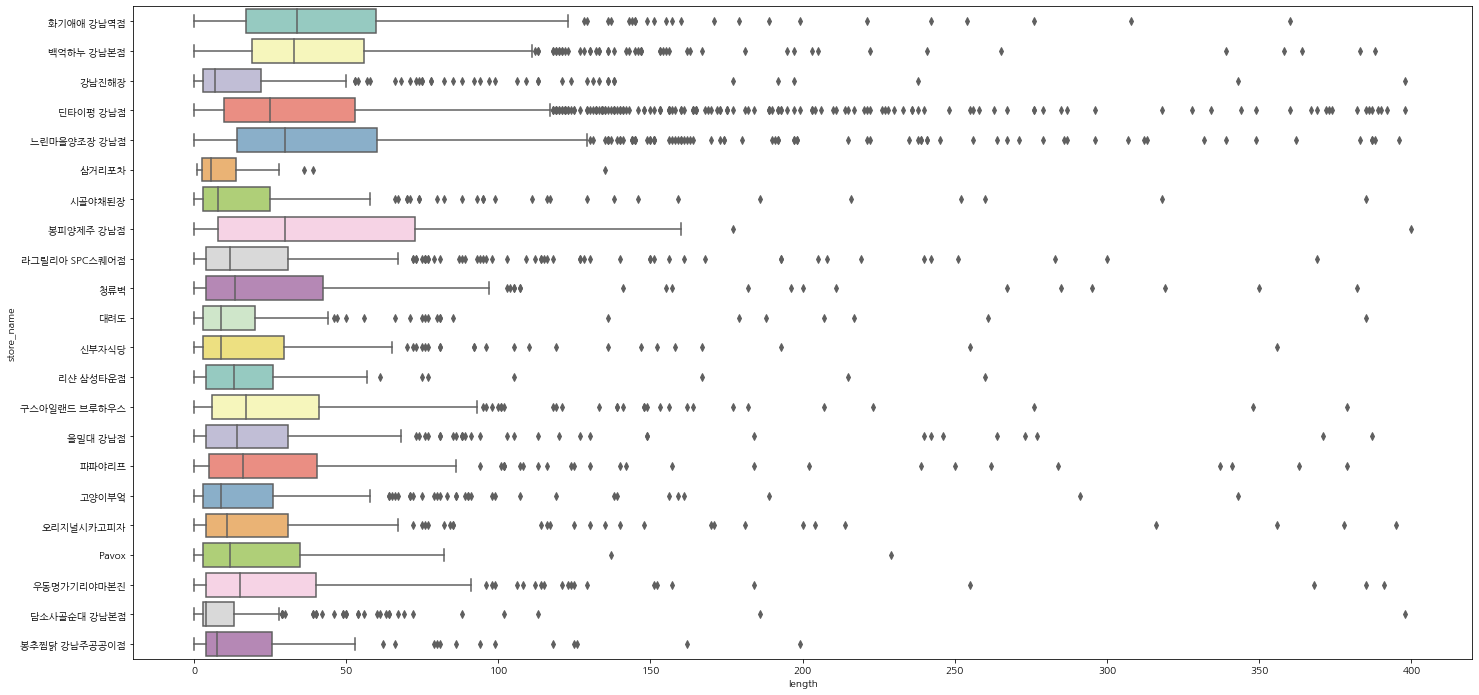

In [36]:
# 전체 데이터로 리뷰 갯수 확인
h1 = (df['store_name'] == '딘타이펑 강남점')
h2 = (df['store_name'] =='백억하누 강남본점')
h3 = (df['store_name'] =='느린마을양조장 강남점')
h4 = (df['store_name'] =='화기애애 강남역점')
h5 = (df['store_name'] =='라그릴리아 SPC스퀘어점')
h6 = (df['store_name'] == '강남진해장')
h7 = (df['store_name']=='구스아일랜드 브루하우스')
h8 = (df['store_name'] =='파파야리프')
h9 = (df['store_name'] =='고양이부엌')
h10 = (df['store_name'] == '시골야채된장')
h11 = (df['store_name'] =='을밀대 강남점')
h12 = (df['store_name'] =='담소사골순대 강남본점')
h13 = (df['store_name'] =='청류벽')
h14 = (df['store_name'] == '우동명가기리야마본진')
h15 = (df['store_name'] =='신부자식당')
h16 = (df['store_name'] =='오리지널시카고피자')
h17 = (df['store_name'] =='대려도')
h18 = (df['store_name'] == '봉추찜닭 강남주공공이점')
h19 = (df['store_name'] =='리샨 삼성타운점')
h20 = (df['store_name'] =='봉피양제주 강남점')
h21 = (df['store_name'] =='Pavox')
h22 = (df['store_name'] =='삼거리포차')

df_h=df[h1 | h2 | h3 | h4 | h4 | h5 | h6 | h7 | h8 | h9 | h10 | h11 | h12 | h13 | h14 | h15 | h16 | h17 | h18 | h19 | h20 | h21 | h22]
plt.figure(figsize=(24,12))
sns.boxplot(y="store_name", x="length", data=df_h, palette="Set3", orient="h")
plt.show();

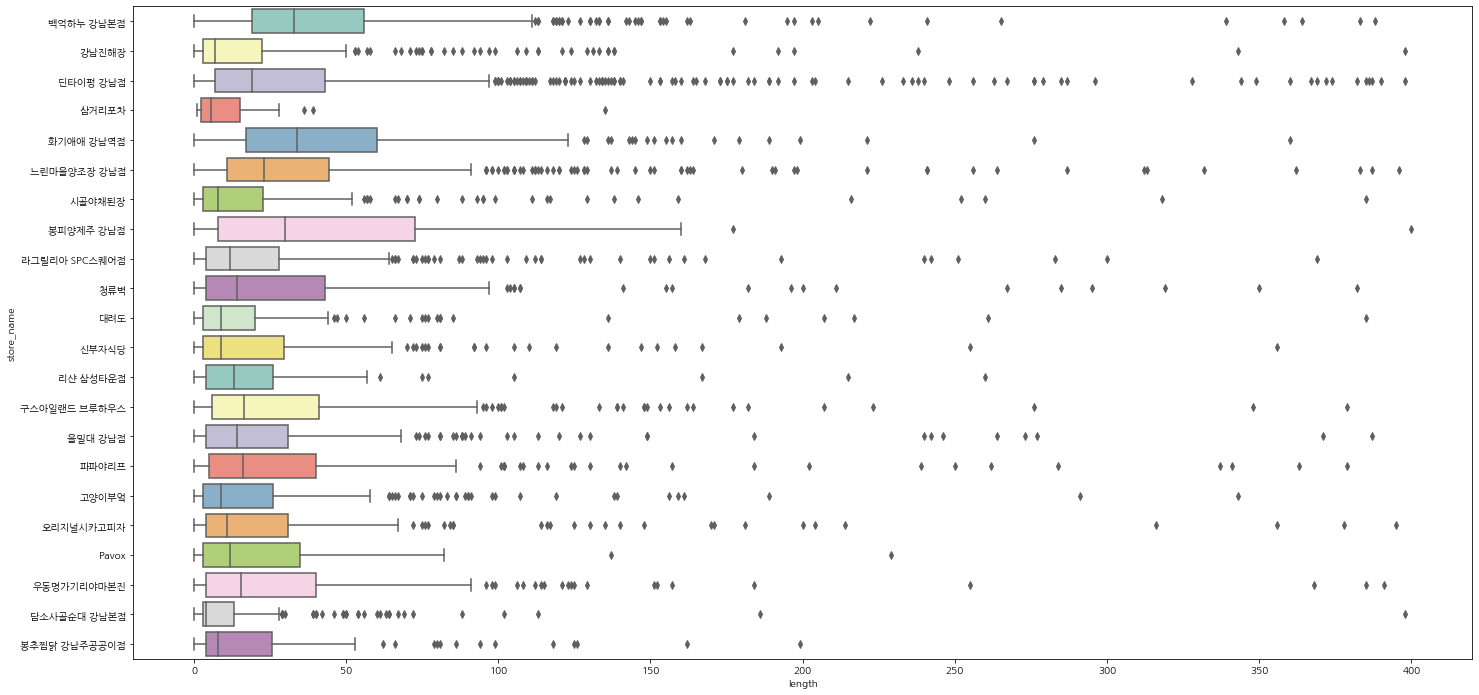

In [37]:
# 2019년 5월 26일 이후 데이터로 리뷰 갯수 확인
h1 = (df_re['store_name'] == '딘타이펑 강남점')
h2 = (df_re['store_name'] =='백억하누 강남본점')
h3 = (df_re['store_name'] =='느린마을양조장 강남점')
h4 = (df_re['store_name'] =='화기애애 강남역점')
h5 = (df_re['store_name'] =='라그릴리아 SPC스퀘어점')
h6 = (df_re['store_name'] == '강남진해장')
h7 = (df_re['store_name']=='구스아일랜드 브루하우스')
h8 = (df_re['store_name'] =='파파야리프')
h9 = (df_re['store_name'] =='고양이부엌')
h10 = (df_re['store_name'] == '시골야채된장')
h11 = (df_re['store_name'] =='을밀대 강남점')
h12 = (df_re['store_name'] =='담소사골순대 강남본점')
h13 = (df_re['store_name'] =='청류벽')
h14 = (df_re['store_name'] == '우동명가기리야마본진')
h15 = (df_re['store_name'] =='신부자식당')
h16 = (df_re['store_name'] =='오리지널시카고피자')
h17 = (df_re['store_name'] =='대려도')
h18 = (df_re['store_name'] == '봉추찜닭 강남주공공이점')
h19 = (df_re['store_name'] =='리샨 삼성타운점')
h20 = (df_re['store_name'] =='봉피양제주 강남점')
h21 = (df_re['store_name'] =='Pavox')
h22 = (df_re['store_name'] =='삼거리포차')

df_re_h=df_re[h1 | h2 | h3 | h4 | h4 | h5 | h6 | h7 | h8 | h9 | h10 | h11 | h12 | h13 | h14 | h15 | h16 | h17 | h18 | h19 | h20 | h21 | h22]
plt.figure(figsize=(24,12))
sns.boxplot(y="store_name", x="length", data=df_re_h, palette="Set3", orient="h")
plt.show();

#### 2) 기간 별 확인

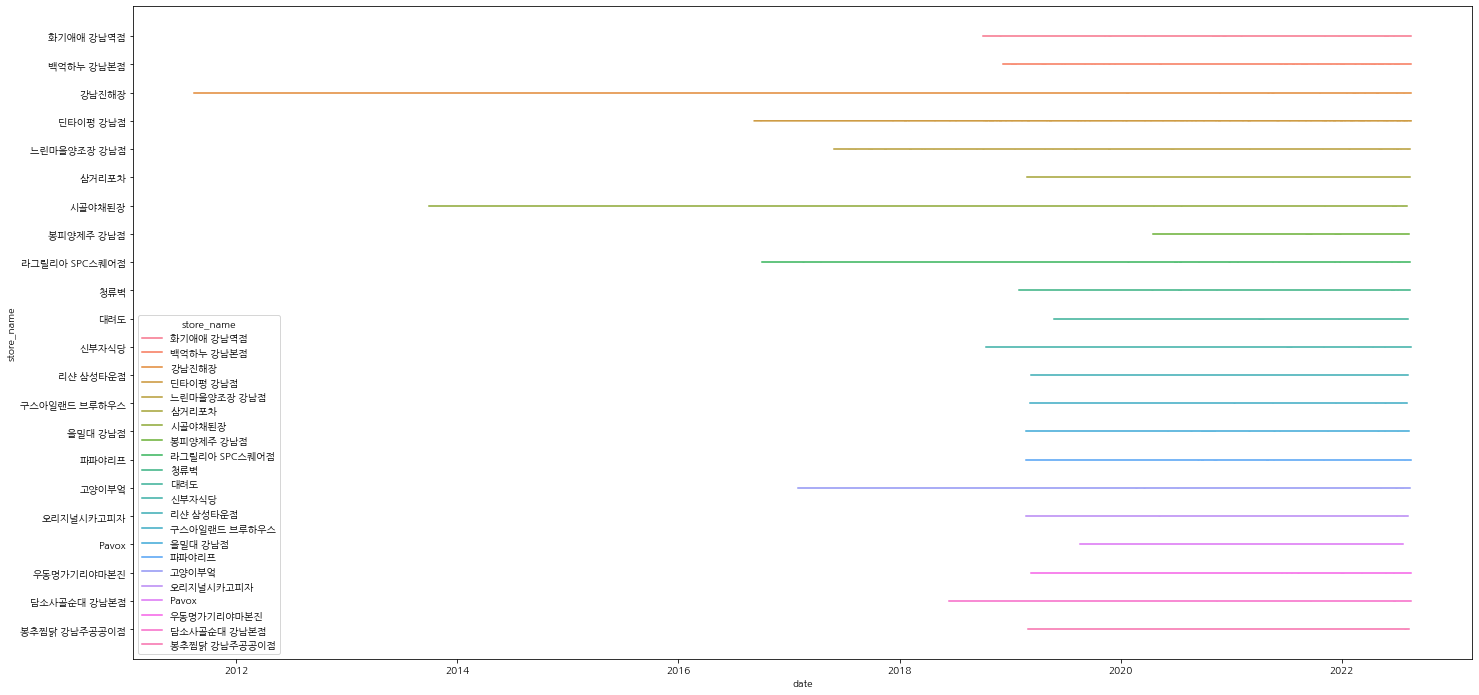

In [49]:
# 전체 데이터로 리뷰 갯수 확인
h1 = (df['store_name'] == '딘타이펑 강남점')
h2 = (df['store_name'] =='백억하누 강남본점')
h3 = (df['store_name'] =='느린마을양조장 강남점')
h4 = (df['store_name'] =='화기애애 강남역점')
h5 = (df['store_name'] =='라그릴리아 SPC스퀘어점')
h6 = (df['store_name'] == '강남진해장')
h7 = (df['store_name']=='구스아일랜드 브루하우스')
h8 = (df['store_name'] =='파파야리프')
h9 = (df['store_name'] =='고양이부엌')
h10 = (df['store_name'] == '시골야채된장')
h11 = (df['store_name'] =='을밀대 강남점')
h12 = (df['store_name'] =='담소사골순대 강남본점')
h13 = (df['store_name'] =='청류벽')
h14 = (df['store_name'] == '우동명가기리야마본진')
h15 = (df['store_name'] =='신부자식당')
h16 = (df['store_name'] =='오리지널시카고피자')
h17 = (df['store_name'] =='대려도')
h18 = (df['store_name'] == '봉추찜닭 강남주공공이점')
h19 = (df['store_name'] =='리샨 삼성타운점')
h20 = (df['store_name'] =='봉피양제주 강남점')
h21 = (df['store_name'] =='Pavox')
h22 = (df['store_name'] =='삼거리포차')

df_h=df[h1 | h2 | h3 | h4 | h4 | h5 | h6 | h7 | h8 | h9 | h10 | h11 | h12 | h13 | h14 | h15 | h16 | h17 | h18 | h19 | h20 | h21 | h22]
plt.figure(figsize=(24,12))
sns.lineplot(y="store_name", x="date", data=df_h, hue='store_name')
plt.show();

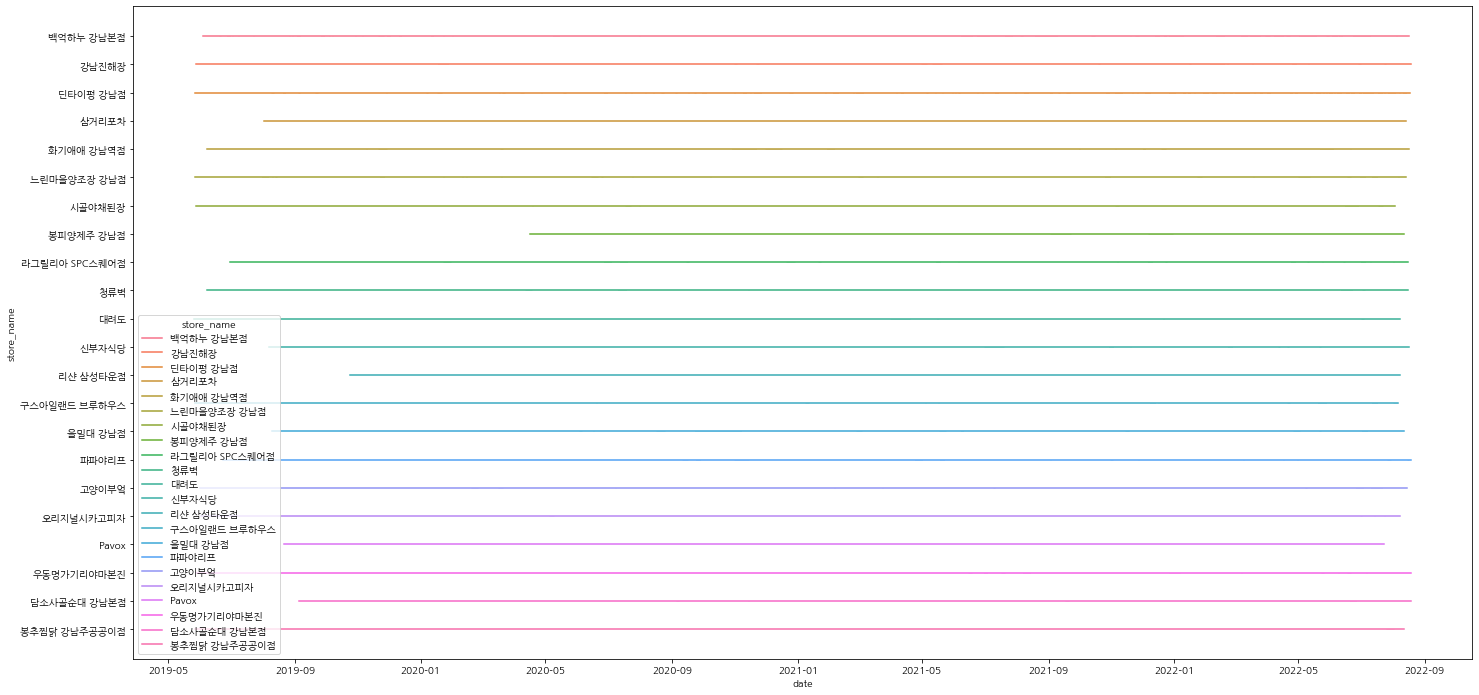

In [50]:
# 2019년 5월 26일 이후 데이터로 리뷰 갯수 확인
h1 = (df_re['store_name'] == '딘타이펑 강남점')
h2 = (df_re['store_name'] =='백억하누 강남본점')
h3 = (df_re['store_name'] =='느린마을양조장 강남점')
h4 = (df_re['store_name'] =='화기애애 강남역점')
h5 = (df_re['store_name'] =='라그릴리아 SPC스퀘어점')
h6 = (df_re['store_name'] == '강남진해장')
h7 = (df_re['store_name']=='구스아일랜드 브루하우스')
h8 = (df_re['store_name'] =='파파야리프')
h9 = (df_re['store_name'] =='고양이부엌')
h10 = (df_re['store_name'] == '시골야채된장')
h11 = (df_re['store_name'] =='을밀대 강남점')
h12 = (df_re['store_name'] =='담소사골순대 강남본점')
h13 = (df_re['store_name'] =='청류벽')
h14 = (df_re['store_name'] == '우동명가기리야마본진')
h15 = (df_re['store_name'] =='신부자식당')
h16 = (df_re['store_name'] =='오리지널시카고피자')
h17 = (df_re['store_name'] =='대려도')
h18 = (df_re['store_name'] == '봉추찜닭 강남주공공이점')
h19 = (df_re['store_name'] =='리샨 삼성타운점')
h20 = (df_re['store_name'] =='봉피양제주 강남점')
h21 = (df_re['store_name'] =='Pavox')
h22 = (df_re['store_name'] =='삼거리포차')

df_re_h=df_re[h1 | h2 | h3 | h4 | h4 | h5 | h6 | h7 | h8 | h9 | h10 | h11 | h12 | h13 | h14 | h15 | h16 | h17 | h18 | h19 | h20 | h21 | h22]
plt.figure(figsize=(24,12))
sns.lineplot(y="store_name", x="date", data=df_re_h, hue='store_name')
plt.show();

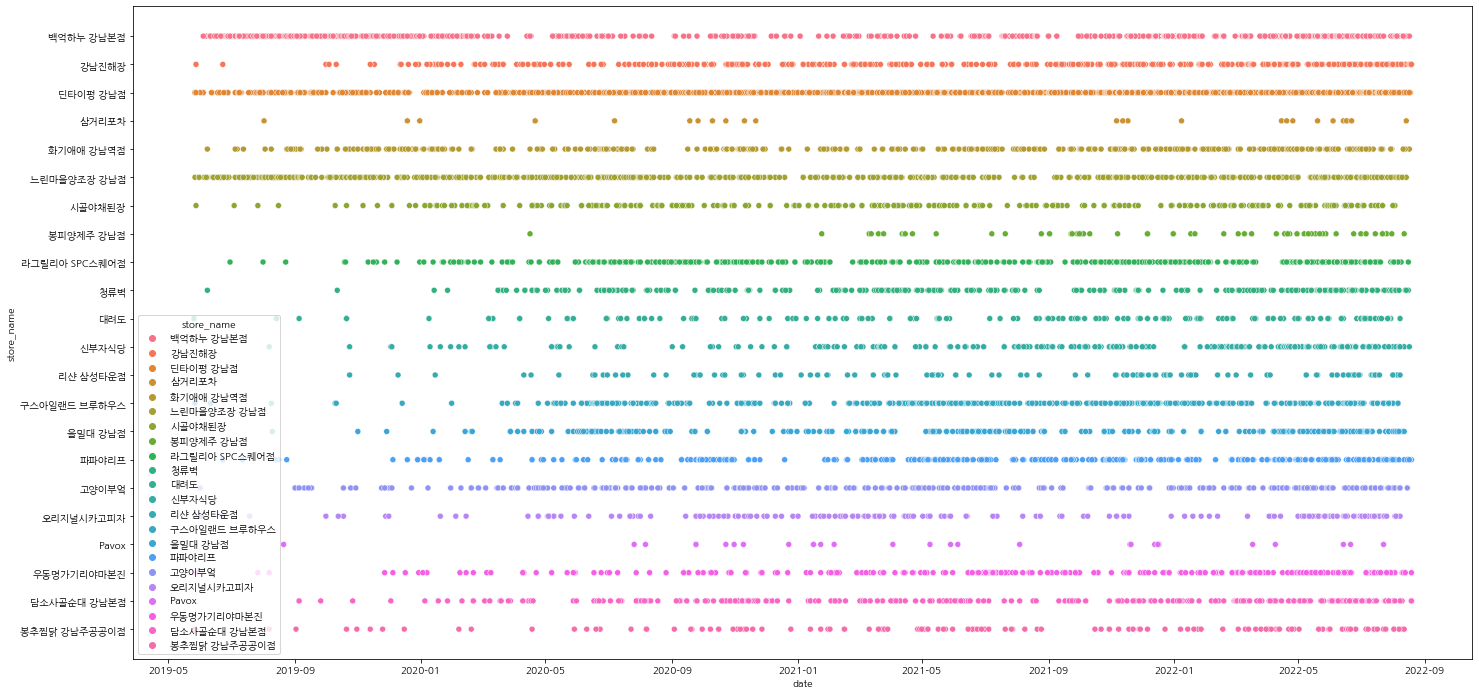

In [52]:
# 2019년 5월 26일 이후 데이터로 리뷰 갯수 확인
h1 = (df_re['store_name'] == '딘타이펑 강남점')
h2 = (df_re['store_name'] =='백억하누 강남본점')
h3 = (df_re['store_name'] =='느린마을양조장 강남점')
h4 = (df_re['store_name'] =='화기애애 강남역점')
h5 = (df_re['store_name'] =='라그릴리아 SPC스퀘어점')
h6 = (df_re['store_name'] == '강남진해장')
h7 = (df_re['store_name']=='구스아일랜드 브루하우스')
h8 = (df_re['store_name'] =='파파야리프')
h9 = (df_re['store_name'] =='고양이부엌')
h10 = (df_re['store_name'] == '시골야채된장')
h11 = (df_re['store_name'] =='을밀대 강남점')
h12 = (df_re['store_name'] =='담소사골순대 강남본점')
h13 = (df_re['store_name'] =='청류벽')
h14 = (df_re['store_name'] == '우동명가기리야마본진')
h15 = (df_re['store_name'] =='신부자식당')
h16 = (df_re['store_name'] =='오리지널시카고피자')
h17 = (df_re['store_name'] =='대려도')
h18 = (df_re['store_name'] == '봉추찜닭 강남주공공이점')
h19 = (df_re['store_name'] =='리샨 삼성타운점')
h20 = (df_re['store_name'] =='봉피양제주 강남점')
h21 = (df_re['store_name'] =='Pavox')
h22 = (df_re['store_name'] =='삼거리포차')

df_re_h=df_re[h1 | h2 | h3 | h4 | h4 | h5 | h6 | h7 | h8 | h9 | h10 | h11 | h12 | h13 | h14 | h15 | h16 | h17 | h18 | h19 | h20 | h21 | h22]
plt.figure(figsize=(24,12))
sns.scatterplot(y="store_name", x="date", data=df_re_h, hue='store_name')
plt.show();